In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
from PIL import Image

## 1. Przekształcenie sfery w elipsoidę
### 1.1 Korzystając z równania parametrycznego narysuj sferę jednostkową w 3D

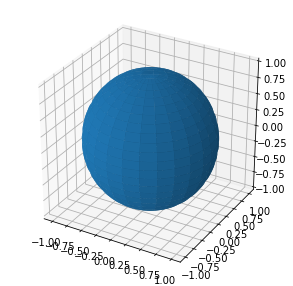

In [2]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

s = np.linspace(0, 2*np.pi, 100)
t = np.linspace(0, np.pi, 100)
r = 1

x = r * np.outer(np.cos(s),np.sin(t))
y = r * np.outer(np.sin(s), np.sin(t))
z = r * np.outer(np.ones(np.size(s)), np.cos(t))
ax.plot_surface(x, y, z,  rstride=4, cstride=4)

plt.show()

### 1.2 

In [25]:
A1 = np.random.rand(3,3)
A2 = np.random.rand(3,3)
A3 = np.random.rand(3,3)

v = np.array([x.flatten(),y.flatten(),z.flatten()])

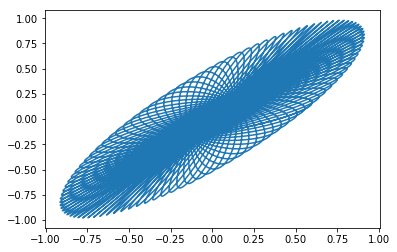

In [26]:
el1 = A1 @ v
el2 = A2 @ v
el3 = A3 @ v

plt.plot(el1[0],el1[1])
plt.show()

In [27]:
def plot3D(x,y,z):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot3D(x,y,z)

    plt.show()

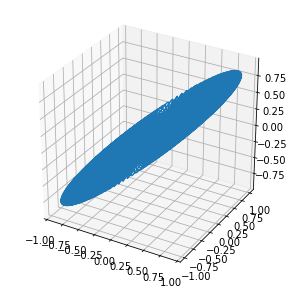

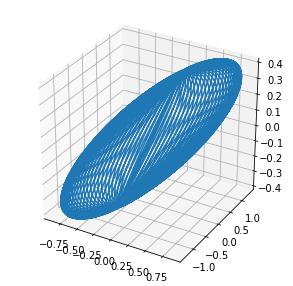

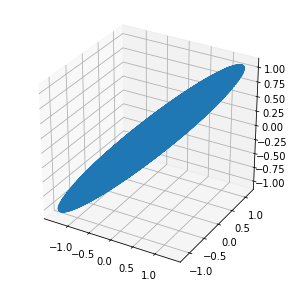

In [28]:
plot3D(el1[0],el1[1],el1[2])
plot3D(el2[0],el2[1],el2[2])
plot3D(el3[0],el3[1],el3[2])

### 1.3

In [29]:
U1, SIG1, V1 = np.linalg.svd(A1)
U2, SIG2, V2 = np.linalg.svd(A2)
U3, SIG3, V3 = np.linalg.svd(A3)

In [30]:
x_start, y_start, z_start = [[0] * 3] * 3
x_end = [0] * 3
y_end = [0] * 3
z_end = [0] * 3

x = x.flatten()
y = y.flatten()
z = z.flatten()

In [31]:
def zad3(el, sigma):
    for i, s1 in enumerate(np.diag(sigma)):
        a = np.dot(U1, s1)
        x_end[i] = a[0]
        y_end[i] = a[1]
        z_end[i] = a[2]
    quiver = [x_start, y_start, z_start, x_end, y_end, z_end]


    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(x, y, z)
    ax.scatter(el[0], el[1], el[2], color='red')
    ax.quiver(x_start, y_start, z_start, x_end, y_end, z_end, color='red')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    plt.show()

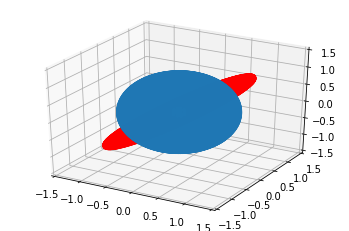

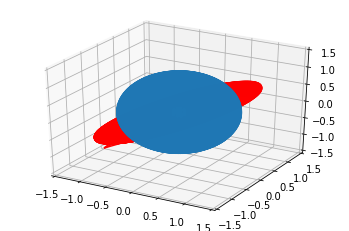

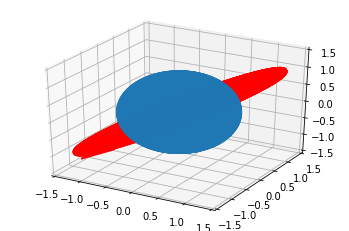

In [32]:
zad3(el1,SIG1)
zad3(el2, SIG2)
zad3(el3, SIG3)

### 1.4

In [38]:
A = np.random.rand(3,3)
U, SIG, V = np.linalg.svd(A)
while SIG[0]/SIG[-1] < 100:
    A = np.random.rand(3,3)
    U, SIG, V = np.linalg.svd(A)
print(A)

[[0.0127205  0.98280756 0.01614221]
 [0.19048871 0.22641628 0.86001173]
 [0.11765255 0.62841394 0.49044761]]


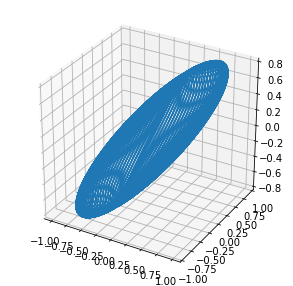

In [39]:
E = A @ v
plot3D(E[0], E[1], E[2])

## 2. Kompresja obrazu


<img src="https://steamuserimages-a.akamaihd.net/ugc/171536664512732189/C0DEC4D2C280C9CE5D77D94D05A205B2A0F7F00A/">

In [8]:
path = "https://steamuserimages-a.akamaihd.net/ugc/171536664512732189/C0DEC4D2C280C9CE5D77D94D05A205B2A0F7F00A/"
M = np.asarray(imageio.imread(path))

SVD_R = np.linalg.svd(M[:,:,0] , full_matrices=False)
SVD_G = np.linalg.svd(M[:,:,1] , full_matrices=False)
SVD_B = np.linalg.svd(M[:,:,2] , full_matrices=False)

In [9]:
def approximation(SVD, k):
    U, SIG, V = SVD
    Uk = np.matrix(U[:, :k])
    Sk = np.diag(SIG[:k])
    Vk = np.matrix(V[:k, :])
    result = Uk * Sk * Vk
    return result

In [10]:
def get_quality(matrix, approx_matrix):
    diff_matrix = np.subtract(matrix, approx_matrix)
    quality = np.linalg.norm(diff_matrix)
    return quality

In [16]:
ks = range(32, 513, 32)
qualities = []
images = []

for k in ks:
    R_appr = approximation(SVD_R, k)
    G_appr = approximation(SVD_G, k)
    B_appr = approximation(SVD_B, k)
    approx_matrix = np.zeros((512,512,3), 'uint8')
    approx_matrix[..., 0] = R_appr
    approx_matrix[..., 1] = G_appr
    approx_matrix[..., 2] = B_appr
    quality = get_quality(M, approx_matrix)
    qualities.append(quality)
    compressed_image = Image.fromarray(np.uint8(approx_matrix), "RGB")
    images.append(compressed_image)
    filename = "image_" + str(k) + ".jpg"
    compressed_image.save(filename)

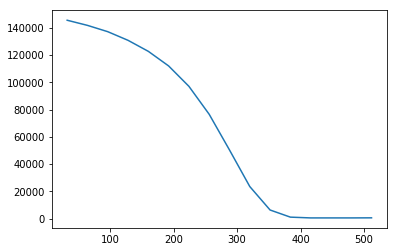

In [17]:
plt.plot(ks, qualities)
plt.show()

In [18]:
images[0].save("image.gif", save_all=True, append_images=images[1:], duration=256, loop=0)

<img src="lennas.gif">